#### https://app.datacamp.com/learn/courses/exploratory-data-analysis-in-python

In [1]:
import pandas as pd
import numpy as np

nsfg = pd.read_hdf('D:/Dokumenty/Komputry/Python/datasets/nsfg.hdf5')

# 1. show no of rows and columns
print(nsfg.shape)

# 2. show column names
nsfg.columns

# 3. select column as ounces
ounces = nsfg['birthwgt_oz1']

# 4. print ounces head
print(ounces.head())

# 5. check outcomes of pregnancies
nsfg['outcome'].value_counts().sort_index()

# 6. Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# 7. Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

(9358, 10)
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64
1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64
count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


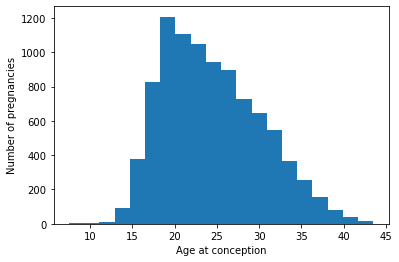

8.255738880918221


In [4]:
# simple plots
# Plot the histogram
import matplotlib.pyplot as plt

plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = nsfg['birthwgt_lb1'][full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

In [5]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())

NameError: name 'birth_weight' is not defined

### Distributions

In [3]:
# !pip3 install empiricaldist
# https://pypi.org/project/empiricaldist/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf #probability mass function
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,10)

gss = pd.read_hdf('D:/Dokumenty/Komputry/Python/datasets/gss.hdf5')

0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
62461    2016
62462    2016
62463    2016
62464    2016
62465    2016
Name: , Length: 62466, dtype: int64


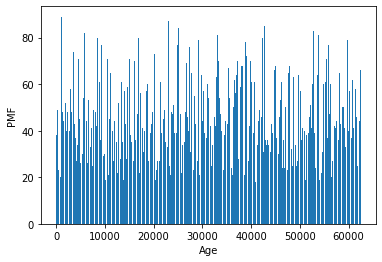

In [11]:
# Compute the PMF for year
pmf_year = Pmf(gss['year'])

# Print the result
print(pmf_year)
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

In [ ]:
# Cumulative Distribution Function
# Select the age column
age = gss['age']
cdf_age = Cdf(age) # cdfs made from age column

print(cdf_age(30))# Calculate the CDF of age 30

cdf = Cdf(gss['age'])

percentile_75th = cdf_income.inverse(0.75) # Calculate the 75th percentile 
percentile_25th = cdf_income.inverse(0.25) # Calculate the 25th percentile
iqr = percentile_75th - percentile_25th    # Calculate the interquartile range

# Print the interquartile range
print(iqr)

In [ ]:
# 2nd example
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)
# Plot it
cdf_income.plot()
# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

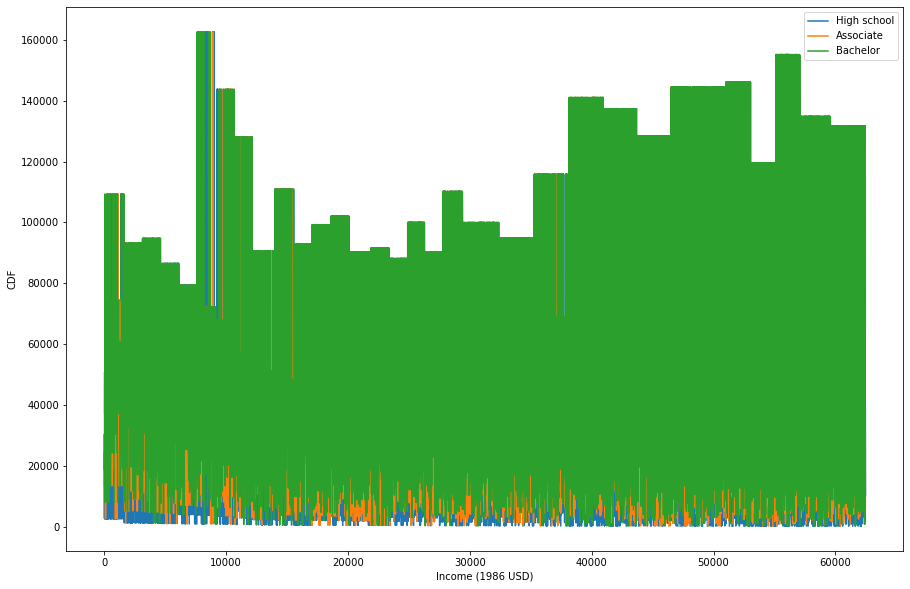

In [18]:
# Comparing distributions

# boolean series for filtering dfs
# Select educ
educ = gss['educ']
bach = (educ >= 16)  # Bachelor's degree
assc = (educ < 16) & (educ >= 14) # Associate degree
high = (educ <= 12) # High school (12 or fewer years of education)
income = gss['realinc']

# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

In [3]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)


4.371148677933652 0.4290043733010077


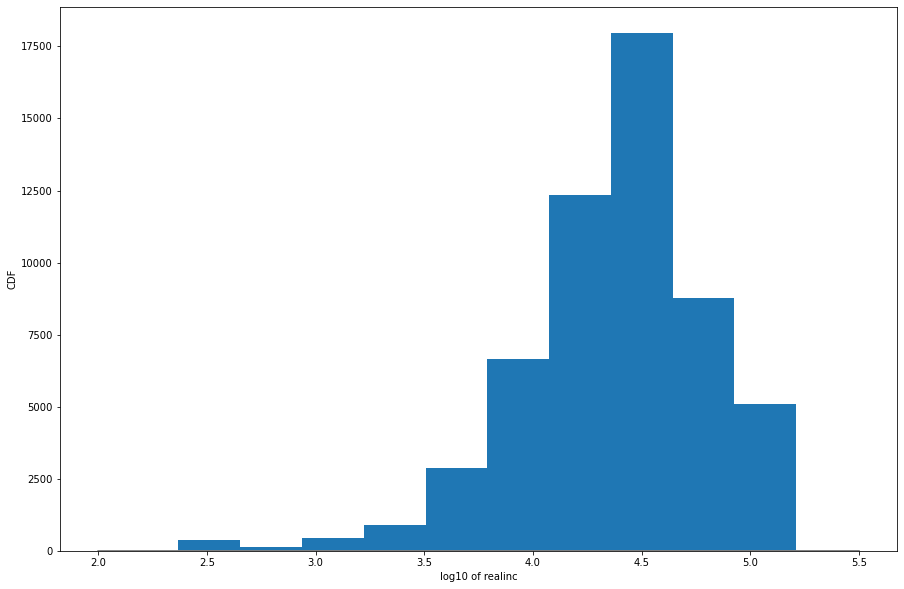

In [20]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
income = gss['realinc']
log_income = np.log10(income)
Cdf(log_income).plot(kind='hist') ## ? dlaczego częstość dla wartości przed cdf?
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

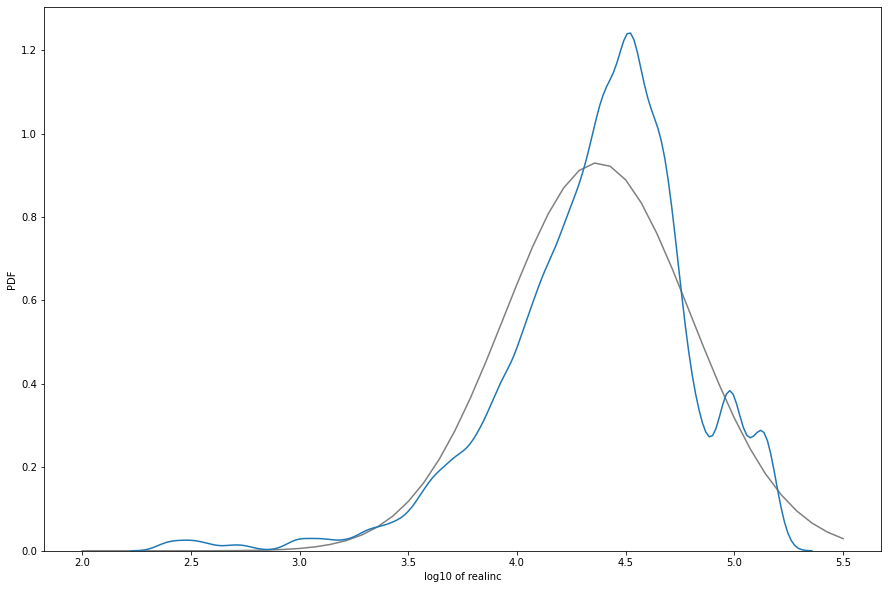

In [26]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

In [2]:
# Exploring relationships
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf #probability mass function
import seaborn as sns

brfss = pd.read_hdf('D:\Dokumenty\Komputry\Python\datasets\\brfss.hdf5')

In [ ]:
# Extract age
age = brfss['AGE']
# Plot the PMF
pmf_age = Pmf(age)
pmf_age.bar()
# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

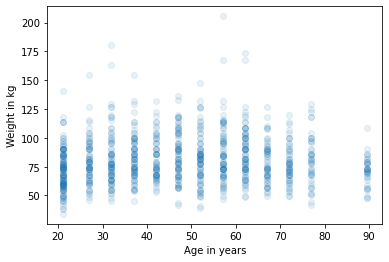

In [7]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

In [ ]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss['AGE']))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

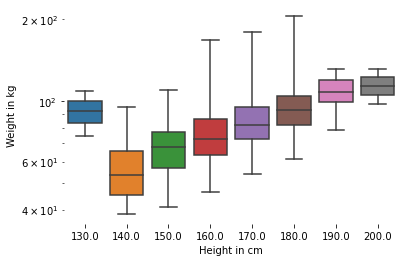

In [8]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

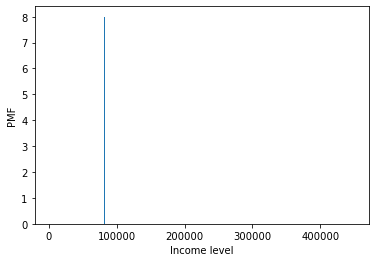

In [9]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf(income).bar()  ## znow cos ssie

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

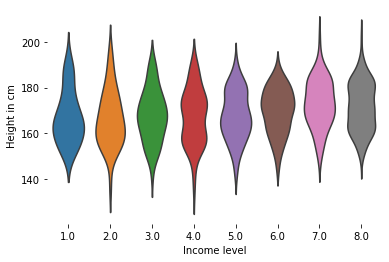

In [10]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(data=data, x='INCOME2', y='HTM4', inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


#### Correlation

In [ ]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

### Multivariate Thinking

In [ ]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

In [ ]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [ ]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ'] ** 2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

In [1]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

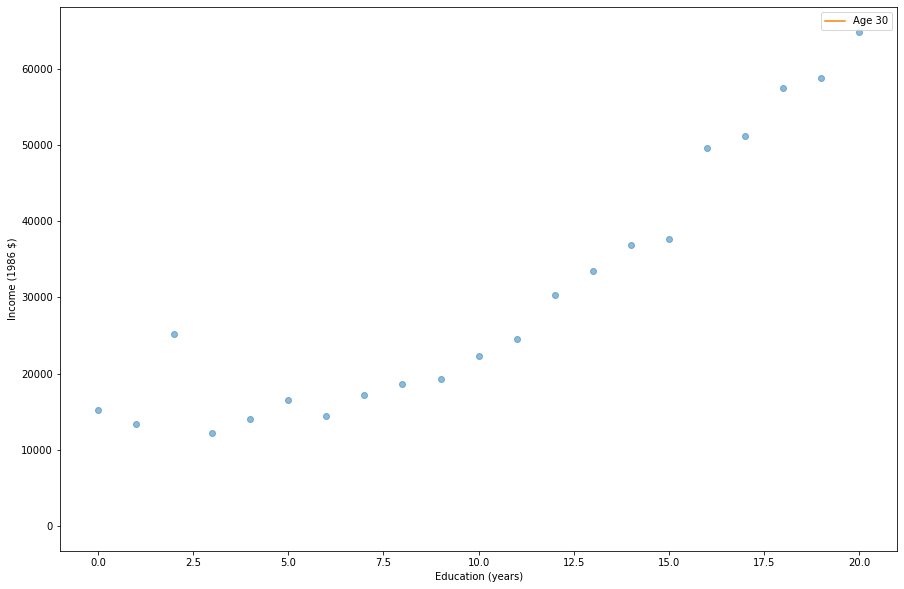

In [9]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

### Logistic regression

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


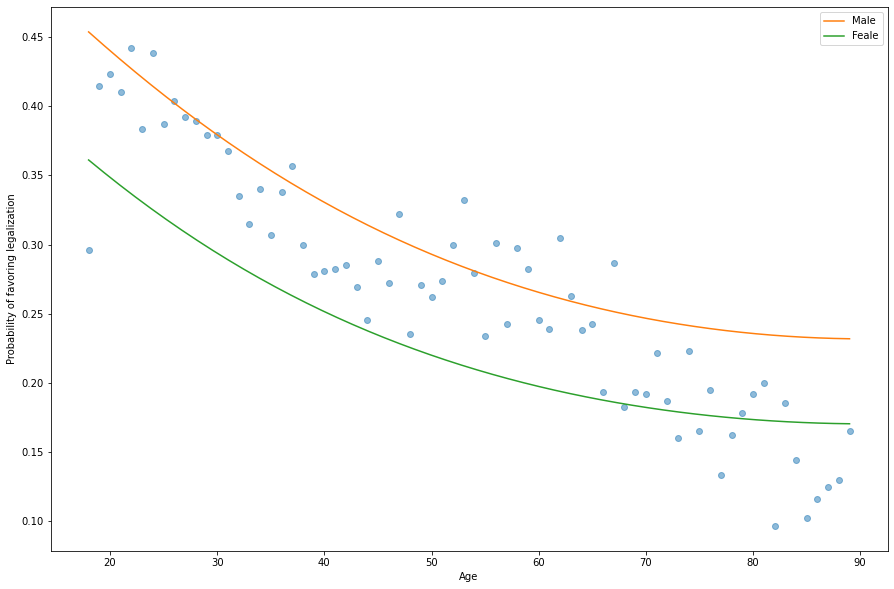

In [8]:
# Recode grass
import statsmodels.formula.api as smf 

gss['grass'].replace(2, 0, inplace=True)
gss['age2'] = gss['age']**2
gss['educ2'] = gss['educ']**2

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Feale')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()